<a href="https://colab.research.google.com/github/SaurabhVora/RNN-Project/blob/main/RNN_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## (1) Load The Time series Google Dataset

In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import yfinance as yf

In [2]:
df = yf.Ticker('GOOG')
df.info

{'address1': '1600 Amphitheatre Parkway',
 'city': 'Mountain View',
 'state': 'CA',
 'zip': '94043',
 'country': 'United States',
 'phone': '650 253 0000',
 'website': 'https://abc.xyz',
 'industry': 'Internet Content & Information',
 'industryKey': 'internet-content-information',
 'industryDisp': 'Internet Content & Information',
 'sector': 'Communication Services',
 'sectorKey': 'communication-services',
 'sectorDisp': 'Communication Services',
 'longBusinessSummary': 'Alphabet Inc. offers various products and platforms in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment provides products and services, including ads, Android, Chrome, devices, Gmail, Google Drive, Google Maps, Google Photos, Google Play, Search, and YouTube. It is also involved in the sale of apps and in-app purchases and digital content in the Google Play and YouTube;

In [3]:
from pandas_datareader import data as pdr
yf.pdr_override()
data = pdr.get_data_yahoo('GOOG')

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...
2024-05-28,175.740005,178.509995,175.679993,178.020004,178.020004,15655300
2024-05-29,176.809998,178.229996,176.259995,177.399994,177.399994,15023800
2024-05-30,176.690002,176.690002,173.229996,173.559998,173.559998,18844000


In [5]:
data.to_csv('GOOG.csv')

In [6]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### (1.1) Split Dataset into Train and Test.

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.04, shuffle=False)
test = test[-20:]
train.to_csv('train.csv')
test.to_csv('test.csv')

# Part 1: Data Preprocessing for RNN  

## (1.1) Importing the Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt

## (1.2) Importing Training Dataset

In [9]:
df_train = pd.read_csv('train.csv')
training_set = df_train.iloc[:, 1:2].values

## (1.3) Feature Scaling...


* Fore the feature Scaling we use Normalisation.Instand of Standardisation.it is best for RNN..

* Formula of Normalisation:

* ```
X<norm> = X - Min(X) / Max(X) - Min(X)
  ```



In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1), copy = True)
training_scaled = sc.fit_transform(training_set)

## (1.4) Data Structure with Timestap

* Time steps in a Recurrent Neural Network (RNN) refer to the sequence of inputs that are fed into the network over time. Each time step represents a single input or observation in the sequence.

* We use 60 Timestaps and 1 output

In [11]:
x_train = []
y_train = []
for i in range(60,4779):
  x_train.append(training_scaled[i-60:i, 0])
  y_train.append(training_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

## (1.5) Re-Shaping the Data

In [12]:
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Part 2: Building the RNN

## (2.1) Importing the Libraries from keras

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [14]:
# Initialising the RNN
regressor = Sequential()

## (2.2)LSTM layer and Dropout Regularisation

LSTM most used Parameters :-

* Units:
     
     * The units argument specifies the dimensionality of the output space. In other words, it specifies the number of neurons in the LSTM layer.

* Return Sequences:

     * The return_sequences argument specifies whether the LSTM layer should return the full sequence of outputs or just the last output. If return_sequences is set to True, the LSTM layer will return a 3D tensor with shape (batch_size, timesteps, units). If return_sequences is set to False, the LSTM layer will return a 2D tensor with shape (batch_size, units).

* Input Shape:

     * The input_shape argument specifies the shape of the input data. The input shape should be a tuple with the following format: (timesteps, features).


#### Dropout :
     
  * Dropout is a technique used in neural networks to prevent overfitting. It works by randomly dropping out (setting to zero) a certain percentage of neurons during training. This forces the network to learn more robust features and prevents it from becoming too reliant on any one neuron.

In [15]:
# First LSTM layer and Dropout
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [16]:
# 2nd LSTM layer and Dropout
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
# 3rd LSTM layer and Dropout
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [18]:
# 4th LSTM layer and Dropout
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [19]:
# Adding output layer
regressor.add(Dense(units = 1))

In [20]:
# Compiling the RNN
regressor.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [23]:
# Fitting the RNN to Training set
regressor.fit(x_train,y_train, epochs = 100, batch_size = 32 )

Epoch 1/100
148/148 [==============================] - 19s 126ms/step - loss: 0.0013
Epoch 2/100
148/148 [==============================] - 20s 133ms/step - loss: 0.0013
Epoch 3/100
148/148 [==============================] - 19s 129ms/step - loss: 0.0010
Epoch 4/100
148/148 [==============================] - 19s 130ms/step - loss: 0.0013
Epoch 5/100
148/148 [==============================] - 19s 129ms/step - loss: 0.0011
Epoch 6/100
148/148 [==============================] - 18s 123ms/step - loss: 0.0011
Epoch 7/100
148/148 [==============================] - 19s 131ms/step - loss: 0.0011
Epoch 8/100
148/148 [==============================] - 19s 129ms/step - loss: 9.6779e-04
Epoch 9/100
148/148 [==============================] - 18s 125ms/step - loss: 9.7549e-04
Epoch 10/100
148/148 [==============================] - 22s 149ms/step - loss: 8.9293e-04
Epoch 11/100
148/148 [==============================] - 19s 128ms/step - loss: 9.3150e-04
Epoch 12/100
148/148 [=========================

# Part 3 : Predictions and Visualising the Result

In [24]:
# getting test data
df_test = pd.read_csv('test.csv')
real_stock_price = df_test.iloc[:, 1:2].values

In [25]:
df_test.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
15,2024-05-28,175.740005,178.509995,175.679993,178.020004,178.020004,15655300
16,2024-05-29,176.809998,178.229996,176.259995,177.399994,177.399994,15023800
17,2024-05-30,176.690002,176.690002,173.229996,173.559998,173.559998,18844000
18,2024-05-31,173.399994,174.419998,170.970001,173.960007,173.960007,28078300
19,2024-06-03,173.919998,175.860001,173.289993,173.880005,173.880005,5432006


In [26]:
dataset_total = pd.concat((df_train['Open'],df_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,80):
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predict_stock = regressor.predict(X_test)
predict_stock = sc.inverse_transform(predict_stock)

1/1 [==============================] - 2s 2s/step


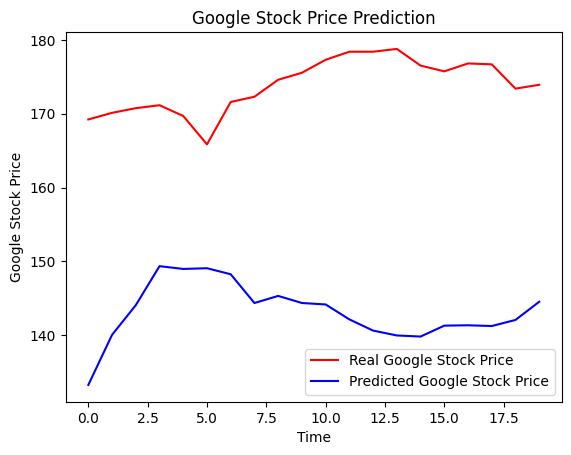

In [27]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predict_stock, color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()